In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model


In [2]:
file = pd.read_csv("USA.csv", usecols = [0,1,2])
file 

,Edad,TC,LCMR
0,17,4.9,0.153
1,22,13.7,0.304
2,27,15.8,0.604
3,32,17.1,2.416
4,37,17.9,8.111
...,...,...,...
65,27,9.7,0.297
66,32,9.0,1.150
67,37,9.1,3.106
68,42,7.3,8.804


In [3]:
gen_1 = file[0:13]
gen_2 = file[13:25]
gen_3 = file[25:36]
gen_4 = file[36:46]
gen_5 = file[46:55]
gen_6 = file[55:63]
gen_7 = file[63:70]

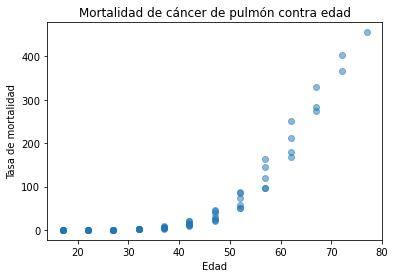

In [23]:
x = np.sort(np.array(file['Edad']))
y = np.sort(np.array(file["LCMR"]))
z = np.sort(np.array(file["TC"]))
cum = np.linspace(1.0/len(y),1.0,len(y))
#suma = get_suma(z)

#_ = plt.scatter(suma, y, c='r')
_ = plt.scatter(x,y,alpha=0.5)
plt.title("Mortalidad de cáncer de pulmón contra edad")
plt.xlabel("Edad")
plt.ylabel("Tasa de mortalidad")
plt.savefig("MvsE")

In [5]:
def get_suma(y):
    z = []
    #z.append(y[0])
    for i in range(len(y)):
        z.append(np.sum(y[0:i+1]))
        
    return np.array(z)

In [6]:
lin = sklearn.linear_model.LinearRegression()

In [7]:
X = np.array([x]).T

In [8]:
lin.fit(X,y)

LinearRegression()

In [9]:
y_pred = lin.predict(X)
y_pred = np.sort(y_pred, axis= 0)

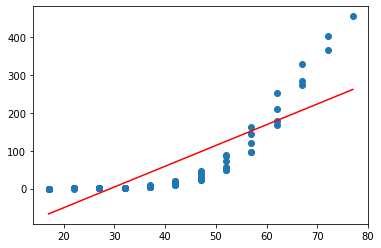

In [10]:
plt.scatter(x, y)
plt.plot(x, y_pred,'r')

In [11]:
score = lin.score(X, y)
print("y =   {}*X_1 +{} con R^2 de {}".format(lin.coef_[0],lin.intercept_,score))

y =   5.4872808730936065*X_1 +-160.3629610745768 con R^2 de 0.6820148076860362


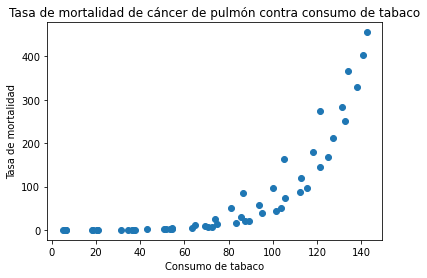

In [26]:
y1 = (np.concatenate((gen_1["LCMR"],gen_2["LCMR"],gen_3["LCMR"],gen_4["LCMR"],gen_5["LCMR"])))
x1 = (np.concatenate((get_suma(gen_1["TC"]) , get_suma(gen_2["TC"]),get_suma(gen_3["TC"]),get_suma(gen_4["TC"]),get_suma(gen_5["TC"]))))
z = (np.concatenate((gen_1["Edad"],gen_2["Edad"],gen_3['Edad'],gen_4['Edad'],gen_5['Edad'])))
#w1 = np.array(gen_1["TC"])
plt.scatter(x1,y1)
#plt.scatter(z,x1)
#plt.scatter(z,y1)
plt.title("Tasa de mortalidad de cáncer de pulmón contra consumo de tabaco")
plt.xlabel("Consumo de tabaco")
plt.ylabel("Tasa de mortalidad")
plt.savefig("TCVLC")

In [13]:
reg = sklearn.linear_model.LinearRegression()
#get_suma(gen_3["TC"])
x1

array([  4.9,  18.6,  34.4,  51.5,  69.4,  87.5, 103.9, 115.3, 125. ,
       132.9, 137.9, 140.8, 142.6,   6. ,  20.7,  36.8,  54.4,  72.7,
        89.2, 101.6, 112.3, 121.2, 127.4, 131.3, 134. ,   6.4,  20.8,
        37.5,  53.7,  70.7,  83.5,  95.1, 105.4, 113. , 118.1, 121.6,
         6.6,  20.6,  36.3,  50.7,  63.3,  75. ,  85.5,  93.9, 100. ,
       105.3,   5.9,  18.3,  31.5,  43.2,  54.5,  64.9,  74.1,  81. ,
        86.6])

In [14]:
Z = np.array([x1,z]).T
#Z = Z.reshape(2,12).T
Z.shape

(55, 2)

In [15]:
reg.fit(Z,y1)

LinearRegression()

In [16]:
y_n1 = reg.predict(Z)
y_n1

array([-58.47766128, -32.02018786,  -9.66199963,  10.15853587,
        28.41743892,  46.28593385,  67.47289775,  98.42006446,
       132.68570013, 170.46500882, 213.90523514, 261.44474665,
       311.13150278, -60.6249059 , -36.11947305, -14.34689698,
         4.49761823,  21.97570506,  42.96746489,  71.96259104,
       104.27618615, 140.10345428, 181.20123192, 226.78870286,
       274.71862248, -61.40572213, -36.3146771 , -15.71332538,
         5.86404663,  25.87978618,  54.09409611,  84.65085471,
       117.74526604, 156.1101869 , 199.35520917, 245.72349633,
       -61.79613024, -35.92426899, -13.3708767 ,  11.72016832,
        40.32488636,  70.6864409 , 103.39044412, 140.19373253,
       181.48671423, 224.34132838, -60.42970184, -31.43457569,
        -4.001082  ,  26.36047255,  57.50284332,  90.4020506 ,
       125.64370655, 165.3750558 , 207.64405779])

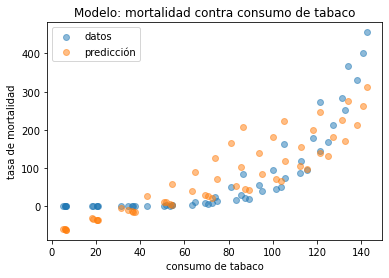

In [29]:
plt.scatter(x1, y1,alpha=0.5, label ="datos")
plt.scatter(x1, y_n1,alpha=0.5, label ="predicción")
#plt.scatter(z,y_n1)
plt.title("Modelo: mortalidad contra consumo de tabaco")
plt.legend()
plt.xlabel("consumo de tabaco")
plt.ylabel("tasa de mortalidad")
plt.savefig("ModeloTC")

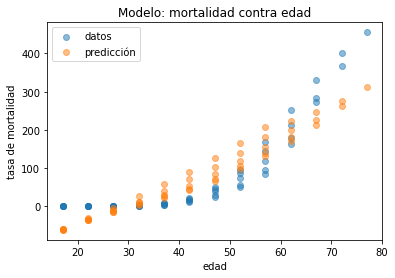

In [30]:
plt.scatter(z,y1, alpha =0.5, label = "datos")
plt.scatter((z),(y_n1),alpha =0.5, label = "predicción")
plt.legend()
plt.title("Modelo: mortalidad contra edad")
plt.xlabel("edad")
plt.ylabel("tasa de mortalidad")
plt.savefig("ModeloEdad")

In [31]:
score = reg.score(Z, y1)
score

0.7429437367375848

In [20]:
reg.coef_, reg.intercept_

(array([-1.95204056, 10.64008583]), -229.79412159950272)

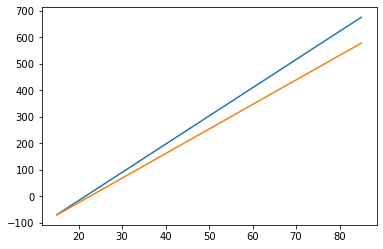

In [21]:
a = np.linspace(15,85,100)
b = reg.coef_[1]*a + reg.intercept_
c = np.ones([100])*0.5
c = get_suma(c)
d = reg.coef_[0]*c +b
plt.plot(a,b)
plt.plot(a,d)

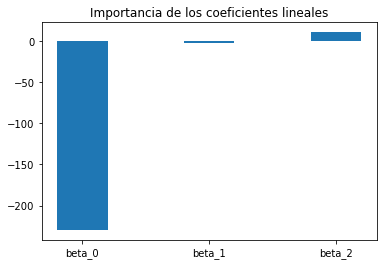

In [35]:
graph = {'beta_0':reg.intercept_,'beta_1':reg.coef_[0],'beta_2':reg.coef_[1]}
courses = list(graph.keys())
values = list(graph.values())
plt.bar(courses, values,width = 0.4)
plt.title("Importancia de los coeficientes lineales")
plt.savefig("import")